<a href="https://colab.research.google.com/github/Armin-Abdollahi/Machine-Learning/blob/main/ML_Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

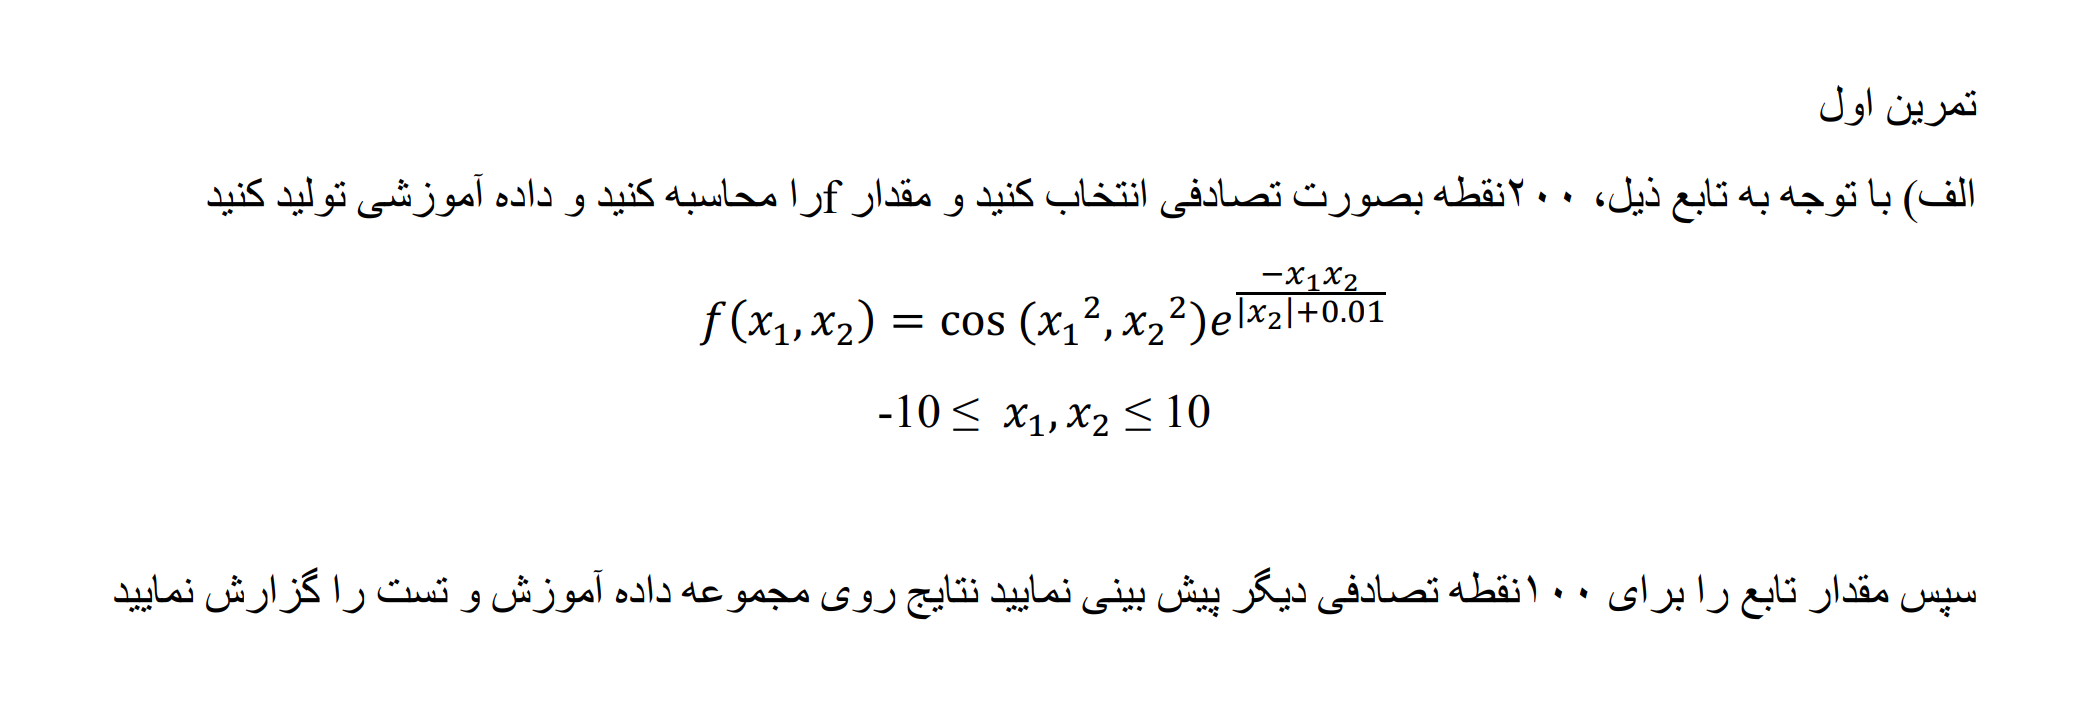

### This code has not used any model for prediction and only calculates and plots the original data and the values of the 'f' function. In other words, the code only generates random points and calculates and plots the values of the 'f' function without using a model to predict the new values.

### Step 1: Generating training data

#### Pick random points

- Random points are generated for x1 and x2 in the interval [-10,10]. For this, you can use the NumPy and random libraries in Python.

#### Calculate function values

- The f function values ​​are calculated for 200 random points.

In [1]:
import numpy as np

# Number of points
n_train = 200

# Generate random points
x1_train = np.random.uniform(-10, 10, n_train)
x2_train = np.random.uniform(-10, 10, n_train)

# Calculate function values
f_train = np.cos(x1_train**2 + x2_train**2) * np.exp(-x1_train * x2_train / np.abs(x2_train) + 0.01)

### Step 2: Predict values ​​for test data

Selecting random points for the test data

For prediction, another 100 random points are selected.

In [2]:
# Number of test points
n_test = 100

# Generate random points for test data
x1_test = np.random.uniform(-10, 10, n_test)
x2_test = np.random.uniform(-10, 10, n_test)

# Compute function values ​​for test data
f_test = np.cos(x1_test**2 + x2_test**2) * np.exp(-x1_test * x2_test / np.abs(x2_test) + 0.01)

### Step 3: Report the results

#### Results report

The results will include function values ​​for training and test data as follows:
- Training data: including x1, x2 and f(x1, x2) for 200 points.
- Test data: including x1, x2 and prediction f(x1, x2) for 100 points.

You can use pandas to display the results.

In [3]:
import pandas as pd

# Create a DataFrame for training data
train_data = pd.DataFrame({'x1': x1_train, 'x2': x2_train, 'f': f_train})

# Create DataFrame for test data
test_data = pd.DataFrame({'x1': x1_test, 'x2': x2_test, 'f_predicted': f_test})

# Display the results
print("Training Data:")
print(train_data.head())
print("\nTesting Data:")
print(test_data.head())

Training Data:
         x1        x2         f
0  3.400383  5.087093  0.032581
1 -2.957248 -9.760249 -0.049563
2 -0.747924  3.855549 -2.048774
3 -1.930644 -5.894086  0.105334
4  2.121886  1.317388  0.120886

Testing Data:
         x1        x2  f_predicted
0 -3.924269 -5.293351     0.016877
1 -5.335821  1.732205   209.405962
2 -5.568227 -3.318078    -0.001490
3 -1.508001  8.292213    -1.560545
4  3.378130  4.560031     0.024257


### Step 4: Plot the data

#### Drawing training data

- To plot the training data, we use scatter to color the points based on f values.

#### Test data plotting

- The test data is plotted in the same way.

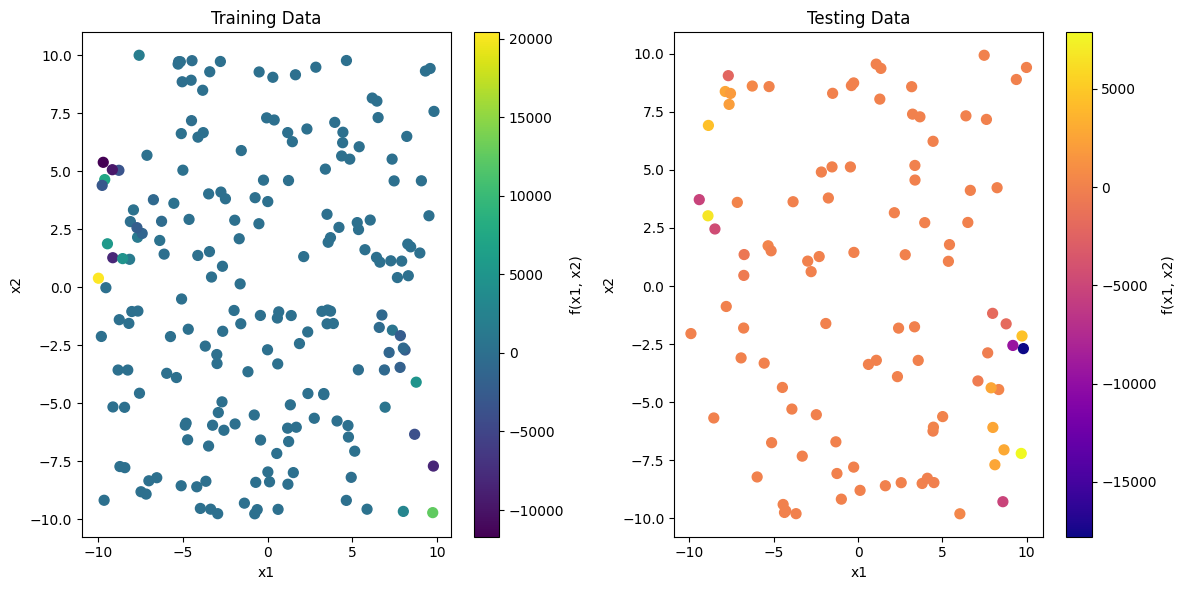

In [4]:
import matplotlib.pyplot as plt

# Draw training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x1_train, x2_train, c=f_train, cmap='viridis', s=50)
plt.colorbar(label='f(x1, x2)')
plt.title('Training Data')
plt.xlabel('x1')
plt.ylabel('x2')

# Plot the test data
plt.subplot(1, 2, 2)
plt.scatter(x1_test, x2_test, c=f_test, cmap='plasma', s=50)
plt.colorbar(label='f(x1, x2)')
plt.title('Testing Data')
plt.xlabel('x1')
plt.ylabel('x2')

plt.tight_layout()
plt.show()

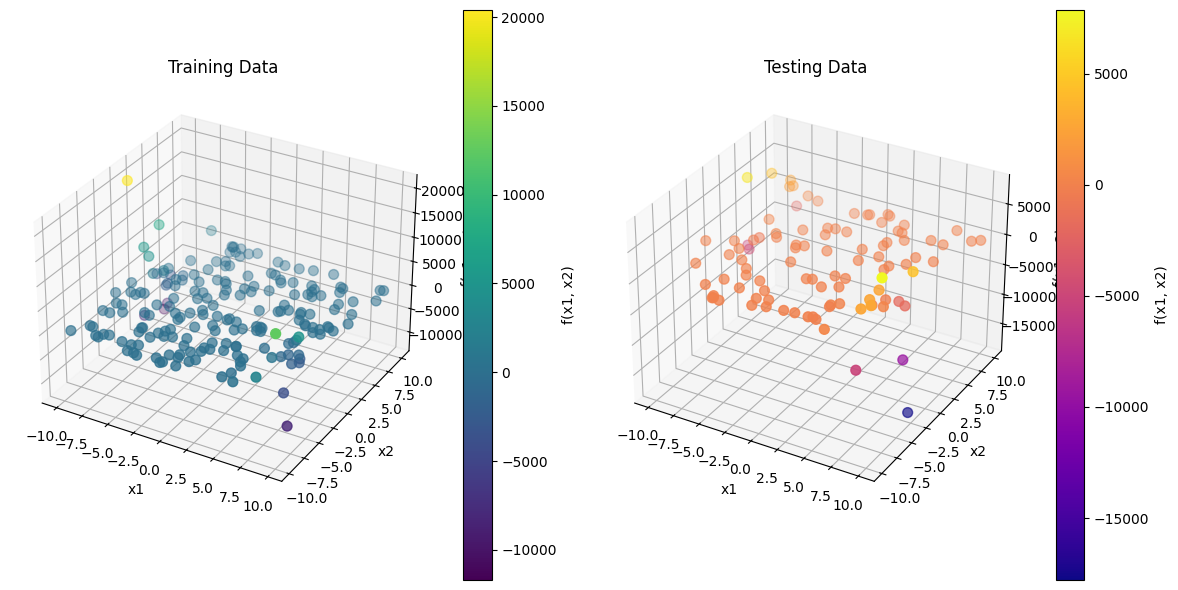

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# Plotting
fig = plt.figure(figsize=(12, 6))

# Training data 3D plot
ax1 = fig.add_subplot(121, projection='3d')
scat1 = ax1.scatter(x1_train, x2_train, f_train, c=f_train, cmap='viridis', s=50)
ax1.set_title('Training Data')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('f(x1, x2)')
fig.colorbar(scat1, ax=ax1, label='f(x1, x2)')

# Test data 3D plot
ax2 = fig.add_subplot(122, projection='3d')
scat2 = ax2.scatter(x1_test, x2_test, f_test, c=f_test, cmap='plasma', s=50)
ax2.set_title('Testing Data')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('f(x1, x2)')
fig.colorbar(scat2, ax=ax2, label='f(x1, x2)')

plt.tight_layout()
plt.show()

---
### By adding linear regression, we build a training model that can learn from the training data and then use it to predict the values ​​of the 'f' function in the test data. This predictive model, unlike the previous code, has the ability to generalize data and can predict new values using learned patterns.

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
# Function definition
def f(x1, x2):
    return np.cos(x1**2 + x2**2) * np.exp(-x1 * x2 / (np.abs(x2) + 0.01))

In [8]:
# Number of points
n_train = 200
n_test = 100

In [9]:
# Generate random points
x1_train = np.random.uniform(-10, 10, n_train)
x2_train = np.random.uniform(-10, 10, n_train)
x1_test = np.random.uniform(-10, 10, n_test)
x2_test = np.random.uniform(-10, 10, n_test)

In [10]:
# Calculate function values
f_train = f(x1_train, x2_train)
f_test = f(x1_test, x2_test)

In [11]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(np.vstack((x1_train, x2_train)).T, f_train)

LinearRegression()

In [12]:
# Predict values ​​for test data
f_test_pred = model.predict(np.vstack((x1_test, x2_test)).T)

In [13]:
# Model evaluation
mse_train = mean_squared_error(f_train, model.predict(np.vstack((x1_train, x2_train)).T))
mse_test = mean_squared_error(f_test, f_test_pred)
print(f"Mean Squared Error on Training Data: {mse_train}")
print(f"Mean Squared Error on Test Data: {mse_test}")

Mean Squared Error on Training Data: 4642212.848589287
Mean Squared Error on Test Data: 2702999.328850815


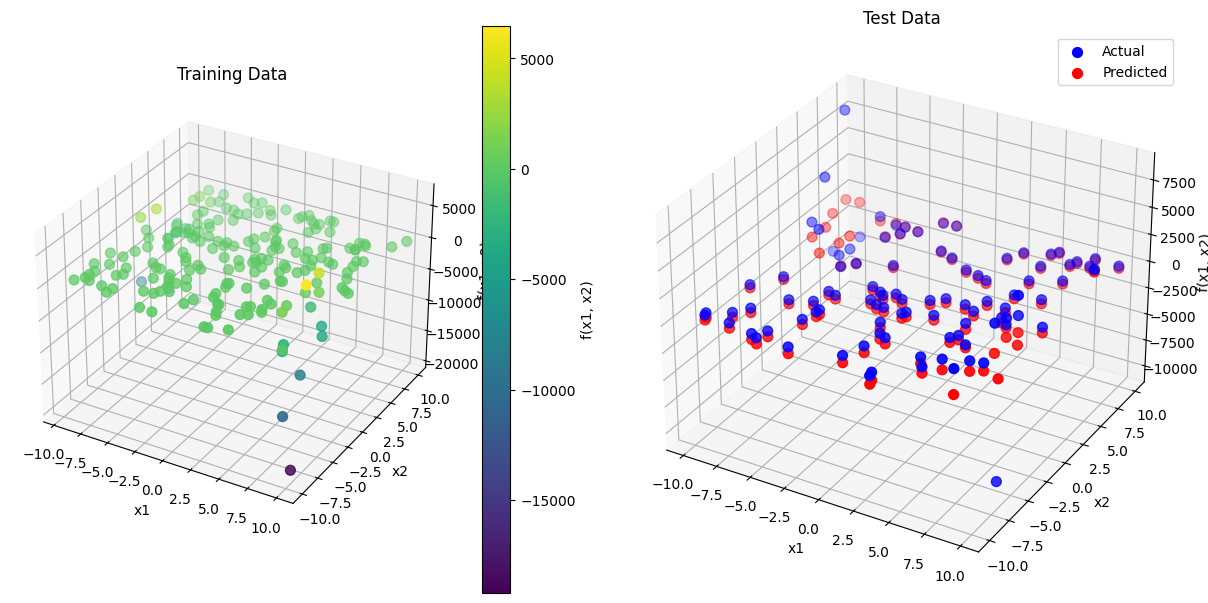

In [14]:
# Plot the data in a 3D graph
fig = plt.figure(figsize=(12, 6))

# Training data
ax1 = fig.add_subplot(121, projection='3d')
scat1 = ax1.scatter(x1_train, x2_train, f_train, c=f_train, cmap='viridis', s=50)
ax1.set_title('Training Data')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('f(x1, x2)')
fig.colorbar(scat1, ax=ax1, label='f(x1, x2)')

# Test data
ax2 = fig.add_subplot(122, projection='3d')
scat2 = ax2.scatter(x1_test, x2_test, f_test, c='blue', label='Actual', s=50)
scat3 = ax2.scatter(x1_test, x2_test, f_test_pred, c='red', label='Predicted', s=50)
ax2.set_title('Test Data')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('f(x1, x2)')
ax2.legend()

plt.tight_layout()
plt.show()